### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv(r"D:\data_set_ALL_AML_train.csv")
df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


### Explore the data

In [17]:
len([col for col in df.columns if "call" in col])

38

In [18]:
df.shape

(7129, 78)

In [19]:
df.call.unique()
# "call" columns not relevant for this analysis, drop them in code down below

array(['A', 'P', 'M'], dtype=object)

In [20]:
df1 = [col for col in df.columns if "call" not in col]
df = df[df1]
df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [21]:
df.shape

(7129, 40)

In [22]:
df.info()
# We see no nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   1                      7129 non-null   int64 
 3   2                      7129 non-null   int64 
 4   3                      7129 non-null   int64 
 5   4                      7129 non-null   int64 
 6   5                      7129 non-null   int64 
 7   6                      7129 non-null   int64 
 8   7                      7129 non-null   int64 
 9   8                      7129 non-null   int64 
 10  9                      7129 non-null   int64 
 11  10                     7129 non-null   int64 
 12  11                     7129 non-null   int64 
 13  12                     7129 non-null   int64 
 14  13                     7129 non-null   int64 
 15  14                   

In [23]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
count,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,...,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000
mean,641.367092,690.246318,698.307897,600.985271,679.532894,564.797728,584.437649,571.359097,789.713705,599.483097,...,514.496704,775.143498,689.248141,626.885959,673.279422,556.463179,718.934493,598.648899,676.920887,723.563473
std,2264.294361,2468.814372,2485.656277,2340.047428,2375.895416,2494.604090,2412.812263,2378.780450,2580.157021,2421.156219,...,2440.722824,2676.664777,2543.537830,2473.180838,2413.149603,2376.681824,2533.678058,2405.268550,2436.964933,2507.382019
min,-19826.000000,-17930.000000,-27182.000000,-23396.000000,-10339.000000,-21658.000000,-24024.000000,-27570.000000,-25171.000000,-12500.000000,...,-16281.000000,-27398.000000,-23673.000000,-23645.000000,-20376.000000,-9501.000000,-17580.000000,-25491.000000,-28400.000000,-27811.000000
25%,-21.000000,-14.000000,-31.000000,-33.000000,8.000000,-26.000000,-33.000000,-58.000000,-14.000000,-15.000000,...,-43.000000,-27.000000,-23.000000,-22.000000,-16.000000,-13.000000,-25.000000,-32.000000,-22.000000,-38.000000
50%,159.000000,130.000000,177.000000,139.000000,146.000000,106.000000,134.000000,140.000000,166.000000,103.000000,...,108.000000,144.000000,134.000000,133.000000,150.000000,82.000000,128.000000,107.000000,155.000000,170.000000
75%,535.000000,488.000000,610.000000,497.000000,471.000000,401.000000,497.000000,527.000000,609.000000,386.000000,...,396.000000,569.000000,505.000000,490.000000,517.000000,309.000000,488.000000,443.000000,549.000000,649.000000
max,31086.000000,29288.000000,28056.000000,31449.000000,29543.000000,38467.000000,41911.000000,40065.000000,23602.000000,28033.000000,...,61228.000000,37164.000000,32204.000000,29169.000000,29833.000000,30354.000000,25055.000000,28350.000000,25093.000000,32946.000000


In [24]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [25]:
df.shape

(7129, 40)

In [26]:
df = df.T
df2 = df.drop(['Gene Description','Gene Accession Number'],axis=0)
df2.index = pd.to_numeric(df2.index)
df2.sort_index(inplace=True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [27]:
df2.shape

(38, 7129)

In [28]:
pd.read_csv(r"D:\actual.csv")

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
...,...,...
67,68,ALL
68,69,ALL
69,70,ALL
70,71,ALL


In [29]:
df2['cat'] = list(pd.read_csv(r"D:\actual.csv")[:38]['cancer'])
dic = {'ALL':0,'AML':1}
df2.replace(dic,inplace=True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cat
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,0
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,0
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,0
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,0
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,0


In [ ]:
# Now PCA will be used to reduce the dimensionality of the dataset.

In [30]:
df2.cat.value_counts()

0    27
1    11
Name: cat, dtype: int64

In [32]:
X=df2.drop('cat',axis=1)
y=df2['cat']

### Scaling data

In [42]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
X_pca= sklearn_pca.fit_transform(X_std)

In [46]:
sklearn_pca.explained_variance_ratio_.cumsum()

array([0.14987793, 0.26965604, 0.33566172, 0.38451094, 0.43083509,
       0.46805475, 0.50296448, 0.53586132, 0.56571468, 0.5921679 ,
       0.61726347, 0.64084201, 0.66289529, 0.68377393, 0.70319176,
       0.72212583, 0.7405972 , 0.7577301 , 0.77478241, 0.79122998,
       0.80658588, 0.82187356, 0.8364345 , 0.85074541, 0.86489756,
       0.87868324, 0.8921573 , 0.90521603, 0.9182476 , 0.93073848])

In [44]:
X.shape,X_pca.shape

((38, 7129), (38, 30))

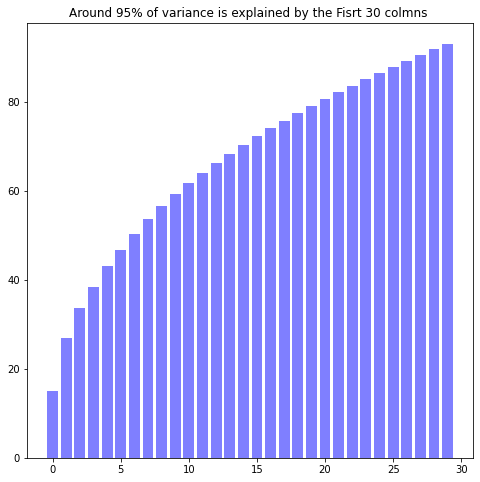

In [45]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(30), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("Around 95% of variance is explained by the Fisrt 30 colmns ");

In [47]:
X_reduced2 = X_pca

In [48]:
df2.cat.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [49]:
train = pd.DataFrame(X_reduced2)
train['cat'] =  df2['cat'].reset_index().cat
train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,cat
0,18.544799,5.826943,-19.442313,-11.267566,5.303304,19.100937,-9.447438,0.915309,-8.665217,-7.912754,...,6.323438,5.630107,-4.538090,-14.672156,4.899964,9.335462,-12.552358,2.484640,12.217094,0
1,-7.341389,10.008663,11.795698,3.920823,-13.999094,-18.636026,4.687060,8.812418,1.372678,-11.690751,...,-11.423156,-10.669290,-5.364779,-20.280586,7.685347,23.676243,5.216321,17.828269,-1.015588,0
2,52.852146,11.390630,-29.548566,-38.800348,-22.866689,-9.458113,-22.880735,20.995112,4.038731,-5.260765,...,1.847696,5.073579,0.797486,0.995521,-0.354742,-0.093794,2.769450,-2.868344,7.354274,0
3,13.688551,-6.246839,-22.623318,-3.982670,-1.351354,13.095198,29.457761,-10.493627,-12.248064,22.248153,...,-0.718683,1.204654,8.036715,21.272887,20.388530,9.384894,1.410416,24.731438,-8.574276,0
4,-36.790106,32.799698,5.253314,-2.790336,-6.602306,10.731372,2.410778,-4.505205,-9.751938,1.651788,...,6.278746,5.829900,-0.235727,3.875653,-2.760198,-2.021964,-2.234259,-2.444749,14.045705,0


### Using PCA 

C:\Users\johnm\AppData\Local\Temp/ipykernel_7548/4238964452.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110,)


[Text(-60.0, 0, ''),
 Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, '')]

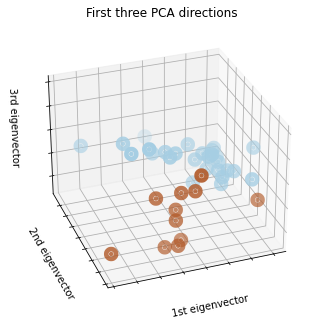

In [50]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3) # For visualization purposes
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=train['cat']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

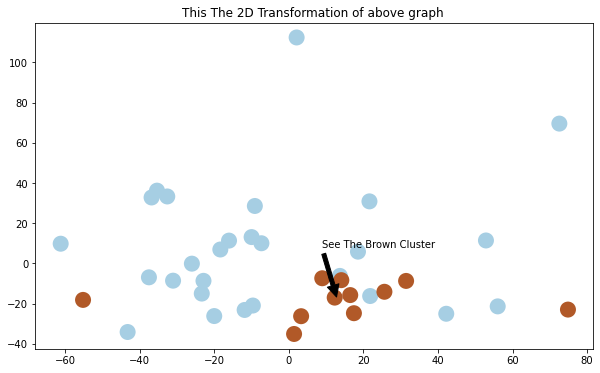

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
sklearn_pca = sklearnPCA(n_components=2) # For visualization purposes
X_reduced  = sklearn_pca.fit_transform(X_std)

fig = plt.figure(1, figsize=(10,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df2['cat'],cmap=plt.cm.Paired,linewidths=10)
plt.annotate('See The Brown Cluster',xy=(13,-18),xytext=(9,8),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r')
plt.title("This The 2D Transformation of above graph ")

In [59]:
X_reduced2=pd.DataFrame(X_reduced)
X_reduced2['cat']=train['cat']


In [62]:
X_reduced2[X_reduced2['cat']==0].mean()

0     -5.582313
1      7.369260
cat    0.000000
dtype: float64

In [63]:
X_reduced2[X_reduced2['cat']==1].mean()

0      13.702041
1     -18.088183
cat     1.000000
dtype: float64

In [65]:
test = pd.read_csv(r"D:\data_set_ALL_AML_independent.csv")

test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [66]:
test.shape

(7129, 70)

In [67]:
test1 = [col for col in test.columns if "call" not in col]
test = test[test1]
test = test.T
test2 = test.drop(['Gene Description','Gene Accession Number'],axis=0)
test2.index = pd.to_numeric(test2.index)
test2.sort_index(inplace=True)
#test2['cat'] = list(pd.read_csv('actual.csv')[39:63]['cancer'])
#dic = {'ALL':0,'AML':1}
#test2.replace(dic,inplace=True)
#test2

In [69]:
from sklearn.preprocessing import StandardScaler
Y_std = StandardScaler().fit_transform(test2)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
test_reduced = sklearn_pca.fit_transform(Y_std)

In [70]:
test_set = pd.DataFrame(test_reduced)

test_set.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,15.954485,-19.998344,34.450819,17.107265,-14.499998,-8.547010,-27.011502,0.893890,28.760512,-11.761661,...,12.181201,-1.930483,-5.577590,0.894264,1.708536,9.909458,1.429599,-1.368022,1.928401,1.395269
1,22.690962,-17.487396,-28.042792,26.803369,-12.457292,12.704222,35.329067,20.194094,43.420264,28.037366,...,3.671538,3.183151,0.897244,0.113003,0.708739,1.036280,4.038658,0.821032,1.411593,1.400042
2,-36.249932,13.988727,-8.697312,10.075214,6.067020,-3.396009,3.167661,13.144338,-3.474793,-5.183876,...,-4.041182,-8.274781,13.887254,-6.468673,-6.302675,-11.033458,-5.795327,-7.775089,-8.975263,11.639648
3,-8.391148,15.127898,19.441011,2.958290,-22.042730,-2.836332,26.680913,-20.035405,-22.631298,21.344269,...,-2.826025,-14.849283,-8.553225,-1.547600,-12.170195,-3.209488,-1.171612,-2.675370,1.797232,6.651076
4,-26.519012,-4.337415,2.575889,15.409114,-11.979343,-13.620273,19.930311,4.168801,-14.523258,36.867510,...,2.814114,22.700322,-0.497514,2.095891,11.069707,-9.263407,5.465493,-1.379227,1.163031,-1.025479


In [75]:
#train.drop('cat',axis=1).iloc[10].plot(kind='hist',figsize=(8,10))

In [68]:
train.shape

(38, 31)

### KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=10,)
clf.fit(train.drop('cat',axis=1),train['cat'])

KNeighborsClassifier(n_neighbors=10)

In [77]:
pred = clf.predict(test_set)

pateint = pd.read_csv(r"D:\actual.csv")['cancer'][38:]
true = pateint.replace(dic)

import sklearn
sklearn.metrics.confusion_matrix(true, pred)

array([[19,  1],
       [13,  1]], dtype=int64)

### Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split=2)
clf.fit(train.drop('cat',axis=1),train['cat'])
pred = clf.predict(test_set)
true = pateint.replace(dic)
print(sklearn.metrics.confusion_matrix(true, pred))
print()

[[13  7]
 [10  4]]



### SVM

In [79]:
from sklearn import svm

clf=svm.SVC(kernel='linear')
clf.fit(train.drop('cat',axis=1),train['cat'])
pred = clf.predict(test_set)

pateint = pd.read_csv(r'D:\actual.csv')['cancer'][38:]

true = pateint.replace(dic)

print(sklearn.metrics.confusion_matrix(true, pred))
print()

[[16  4]
 [13  1]]



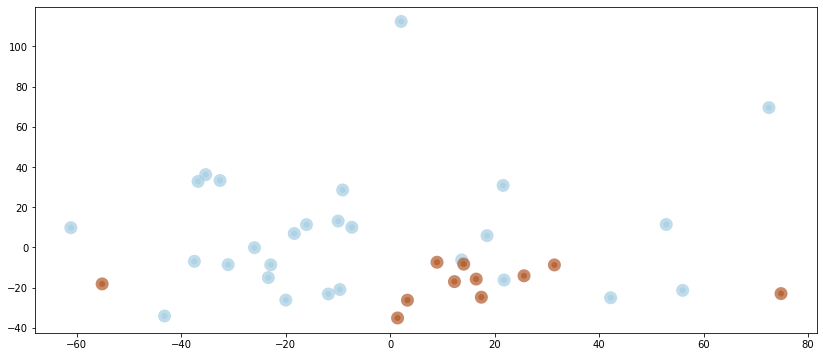

In [82]:
fig = plt.figure(1, figsize=(14,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df2['cat'],cmap=plt.cm.Paired,alpha=0.7,linewidths=7)


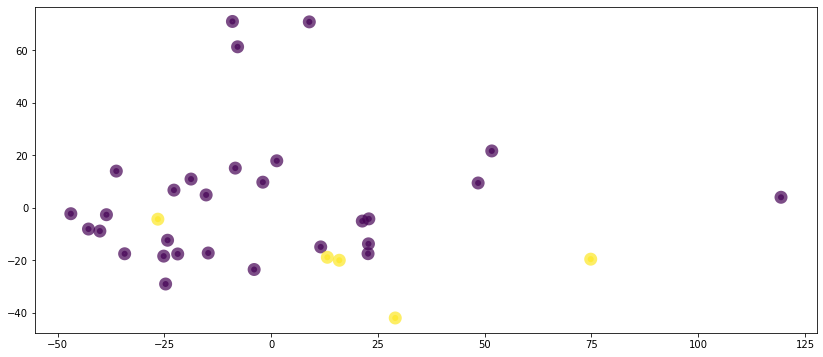

In [86]:
fig = plt.figure(1, figsize=(14,6))
plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c=pred,alpha=0.7,linewidths=7)

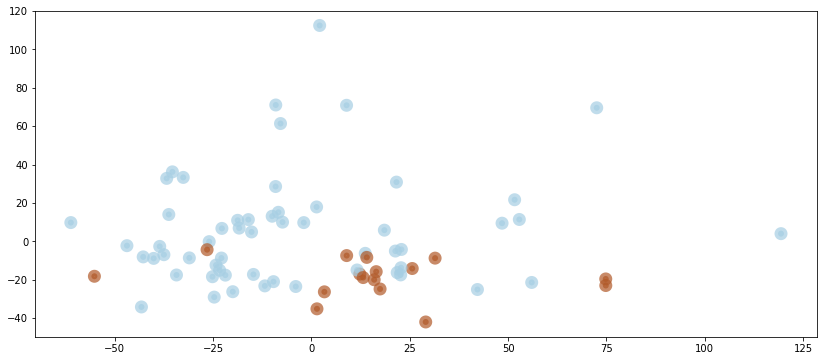

In [90]:
fig = plt.figure(1, figsize=(14,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df2['cat'],cmap=plt.cm.Paired,alpha=0.7,linewidths=7)
plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],cmap=plt.cm.Paired,c=pred,alpha=0.7,linewidths=7)

### Most of the variance,95% was explained by the first 30 columns. KNN performed the best and provided the best explaination for the variance of the data. There were few samples so it's difficult to achieve a high accuarcy,precision,recall and F1 score. 